## Introducción a la ciencia de las redes: _Actividad entregable 4_

#### _Briones Andrade Joshua_


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import networkx as nx

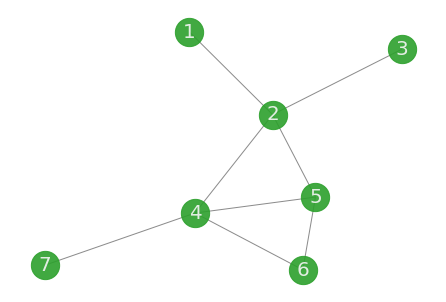

In [132]:
G = nx.Graph()

options = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:green", "font_size": 20, "font_color":"whitesmoke"}

# add nodes and edges
G.add_nodes_from(range(1,7+1))
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,6)])

# establish the position with a fixed seed
pos = nx.spring_layout(G, k=1, iterations=30000, threshold=0.000001, seed=36129312) 
nx.draw(G, pos, with_labels=True, **options)

In [133]:
def grado_prom(G):             # Grado promedio
    N = len(G); k = 0
    for i in range(1, N +1):
        k += G.degree[i]
    return k/N
# --------------------------------------------------
def clustering_prom(G):        # Clustering coeff
    N = len(G); k = 0
    for i in range(1, N+1):
        k += nx.clustering(G, i)
    return k/N
# --------------------------------------------------
def betweenness_prom(G):       # Betweenness
    N = len(G); s = 0
    B_dict = nx.betweenness_centrality(G, k=N)
    for key in B_dict:
        s += B_dict[key]
    return s/N
# --------------------------------------------------
def shortest_path_length_prom(G): # Camino más corto
    N = len(G); s = 0
    p = dict(nx.shortest_path_length(G))
    for i in p:
        for j in p[i]:
            s += p[i][j]
    return s/(N*(N-1))
# --------------------------------------------------
def closeness_prom(G):         # Closeness
    N = len(G); s = 0
    p = nx.closeness_centrality(G)
    for key in p:
        s += p[key]
    return s/N
# ---------------------------------------------------
def eccentricity_prom(G):      # Excentricidad
    N = len(G); s = 0
    p = nx.eccentricity(G, v=None)
    for key in p:
        s += p[key]
    return s/N

In [134]:
print("----------- Grado [k] ------------\n")
print("Promedio:", grado_prom(G), "\n")
print("----- Clustering coefficient -----\n")
print("Promedio:", clustering_prom(G))
print("Nodo 5:  ", nx.clustering(G, 5), "\n")
print("----- Betweenness centrality -----","\n")
print("Promedio:", betweenness_prom(G))
print("Nodo 2:  ", nx.betweenness_centrality(G, k=7)[2], "\n")
print("------ Shortest path length ------","\n")
print("Promedio:", shortest_path_length_prom(G))
print("3 -> 7:  ", nx.shortest_path_length(G, source=3, target=7), "\n")
print("------ Closeness centrality ------","\n")
print("Promedio:", closeness_prom(G))
print("Nodo 5:  ", nx.closeness_centrality(G, u=5), "\n")
print("---------- Eccentricity ----------\n")
print("Promedio:", eccentricity_prom(G), "\n")
# print("Nodo 4:  ", nx.nx.eccentricity(G, v=4))
print("------- Diámetro de la red -------\n")
print("Diámetro:", nx.diameter(G))

----------- Grado [k] ------------

Promedio: 2.2857142857142856 

----- Clustering coefficient -----

Promedio: 0.3095238095238095
Nodo 5:   0.6666666666666666 

----- Betweenness centrality ----- 

Promedio: 0.1619047619047619
Nodo 2:   0.6 

------ Shortest path length ------ 

Promedio: 1.8095238095238095
3 -> 7:   3 

------ Closeness centrality ------ 

Promedio: 0.5787545787545787
Nodo 5:   0.6666666666666666 

---------- Eccentricity ----------

Promedio: 2.5714285714285716 

------- Diámetro de la red -------

Diámetro: 3


In [141]:
nx.katz_centrality(G, alpha=0.1, beta=0.1, max_iter=3000, normalized=False)

{1: 0.1152840158,
 2: 0.15284154160000002,
 3: 0.1152840158,
 4: 0.154171848,
 5: 0.14367942720000001,
 6: 0.1297848352,
 7: 0.11541703160000001}

In [91]:
def eigenvalue_prom(G):             # Centralidad de eigenvector
    N = len(G); s = 0
    B_dict = nx.eigenvector_centrality(G)
    for key in B_dict:
        s += B_dict[key]
    return s/N
# --------------------------------------------------
def katz_prom(G, alpha=0.1, beta=1.0): # Camino más corto
    N = len(G); s = 0
    p = nx.katz_centrality(G, alpha=alpha, beta=beta, normalized=False)
    for i in p:
        for j in p[i]:
            s += p[i][j]
    return s/(N*(N-1))
# --------------------------------------------------
def pagerank_prom(G):         # Closeness
    N = len(G); s = 0
    p = nx.pagerank_numpy(G, alpha=0.85, dangling=None)
    for key in p:
        s += p[key]
    return s/N

In [146]:
print("----------- Centralidad de eigenvector ------------\n")
print("Promedio:", eigenvalue_prom(G))
print("Nodo 4:  ", nx.eigenvector_centrality(G)[4], "\n")
print("----- Centralidad de Katz (alpha=lambda, beta=1) -----\n")
print("Promedio:", katz_prom(G, alpha=nx., beta=1.0))
print("Nodo 5:  ", nx.clustering(G, 5), "\n")
print("----- Centralidad de Katz (alpha=0.1, beta=1) -----\n")
print("Promedio:", katz_prom(G, alpha=0.1, beta=1.0), "\n")
print("------ Shortest path length ------","\n")
print("Promedio:", shortest_path_length_prom(G))
print("3 -> 7:  ", nx.shortest_path_length(G, source=3, target=7), "\n")
print("------ Closeness centrality ------","\n")
print("Promedio:", closeness_prom(G))
print("Nodo 5:  ", nx.closeness_centrality(G, u=5), "\n")
print("---------- Eccentricity ----------\n")
print("Promedio:", eccentricity_prom(G), "\n")
# print("Nodo 4:  ", nx.nx.eccentricity(G, v=4))
print("------- Diámetro de la red -------\n")
print("Diámetro:", nx.diameter(G))

----------- Centralidad de eigenvector ------------

Promedio: 0.34553736387892064
Nodo 4:   0.5416128697886126 

----- Centralidad de Katz (beta=1, alpha=lambda) -----

Promedio: 0.3095238095238095
Nodo 5:   0.6666666666666666 

----- Betweenness centrality ----- 

Promedio: 0.1619047619047619
Nodo 2:   0.6 

------ Shortest path length ------ 

Promedio: 1.8095238095238095
3 -> 7:   3 

------ Closeness centrality ------ 

Promedio: 0.5787545787545787
Nodo 5:   0.6666666666666666 

---------- Eccentricity ----------

Promedio: 2.5714285714285716 

------- Diámetro de la red -------

Diámetro: 3


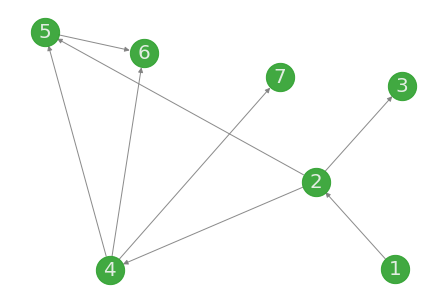

In [124]:
G = nx.DiGraph()

options = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:green", "font_size": 20, "font_color":"whitesmoke"}

# add nodes and edges
G.add_nodes_from(range(1,7+1))
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,6)])

# establish the position with a fixed seed
pos = nx.spring_layout(G, k=1, iterations=3, threshold=0.0001, seed=35129314) 
nx.draw(G, pos, with_labels=True, **options)

In [127]:
nx.pagerank_numpy(G, alpha=0.85, dangling=None)

C:\Users\Joshu\AppData\Local\Temp\ipykernel_5960\737859200.py:1: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  nx.pagerank_numpy(G, alpha=0.85, dangling=None)


{1: 0.08077118079781859,
 2: 0.14942668447596416,
 3: 0.12310874139934175,
 4: 0.12310874139934176,
 5: 0.15798955146248841,
 6: 0.24994310960408012,
 7: 0.11565199086096521}

###  Apéndice

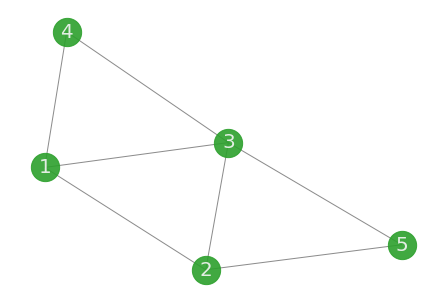

In [130]:
G = nx.Graph()

options = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:green", "font_size": 20, "font_color":"whitesmoke"}

# add nodes and edges
G.add_nodes_from(range(1,5+1))
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(2,5),(3,4),(3,5)])

# establish the position with a fixed seed
pos = nx.spring_layout(G, k=1, iterations=3000, threshold=0.00001, seed=6229312) 
nx.draw(G, pos, with_labels=True, **options)

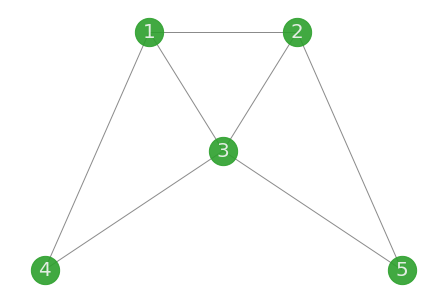

In [2]:
G = nx.Graph()

options = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:green", "font_size":20, "font_color":"whitesmoke"}

# add nodes and edges
G.add_nodes_from(range(1,5+1))
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(2,5),(3,4),(3,5)])

# establish the position with a fixed seed
pos = nx.spring_layout(G, seed=31137942) 
nx.draw_spectral(G, with_labels=True, **options)

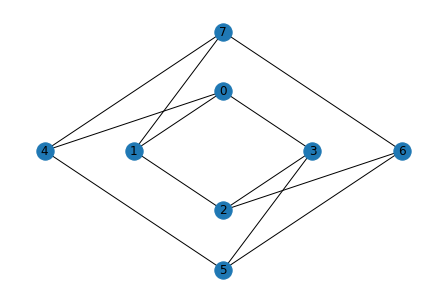

In [3]:
G = nx.cubical_graph()
pos = nx.spring_layout(G, seed=3113794)

nx.draw_shell(G, nlist=[range(4), range(4,8)], with_labels=True)
